In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_union, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import spacy
from textblob import TextBlob

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import GridSearchCV

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./merged_df.csv')

In [3]:
df.head()

,character,text,ep_title_formatted,airdate,ep_title_y,number,rating,season,index
0,LOCUTUS,Resistance is futile.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
1,LOCUTUS,You will disarm your weapons and escort us to ...,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
2,LOCUTUS,"If you attempt to intervene, we will destroy you.",emissary,3 Jan. 1993,Emissary,1,7.5,1,1
3,LOCUTUS,It is malevolent.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
4,LOCUTUS,Destroy it now.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1


In [4]:
df['character'].value_counts()[:40]

SISKO        14023
KIRA          8963
BASHIR        8668
QUARK         8649
O'BRIEN       8238
ODO           7467
DAX           6016
WORF          3113
GARAK         2854
DUKAT         2612
JAKE          2279
NOG           2092
ROM           2049
EZRI          1697
WEYOUN        1068
WINN           984
MARTOK         951
KEIKO          806
VIC            708
ZEK            704
DAMAR          693
EDDINGTON      641
KASIDY         618
BAREIL         521
COMPUTER       486
SLOAN          482
FOUNDER        474
JOSEPH         407
KOR            405
ISHKA          395
BRUNT          389
ROSS           350
JACK           328
MORA           314
LEETA          311
LWAXANA        288
BILBY          286
TAIN           273
ZIYAL          259
GHEMOR         249
Name: character, dtype: int64

In [5]:
common_chars = df['character'].value_counts()[:25].index
common_chars

Index(['SISKO', 'KIRA', 'BASHIR', 'QUARK', 'O'BRIEN', 'ODO', 'DAX', 'WORF',
       'GARAK', 'DUKAT', 'JAKE', 'NOG', 'ROM', 'EZRI', 'WEYOUN', 'WINN',
       'MARTOK', 'KEIKO', 'VIC', 'ZEK', 'DAMAR', 'EDDINGTON', 'KASIDY',
       'BAREIL', 'COMPUTER'],
      dtype='object')

In [6]:
df['ep_title_formatted'].value_counts()[:10]

thewayofthewarrior          1344
whatyouleavebehind          1253
emissary                    1043
statisticalprobabilities     851
profitandlace                796
farbeyondthestars            790
playinggod                   784
rulesofacquisition           781
thejemhadar                  780
ferengilovesongs             774
Name: ep_title_formatted, dtype: int64

In [8]:
def episode_to_dictionary(df, episode_name):
    ''' Returns for an episode a dictionary of common character sentence counts. '''
    temp_df = df.loc[df['ep_title_formatted'] == episode_name]
    temp_dict = {}
    for index, row in temp_df.iterrows():
        if row['character'] in common_chars:
            temp_dict.setdefault(row['character'], 0)
            temp_dict[row['character']] += 1
    return temp_dict

In [9]:
episode_to_dictionary(df, 'rocksandshoals')

{'BASHIR': 25,
 'COMPUTER': 2,
 'DAX': 16,
 'GARAK': 35,
 'JAKE': 19,
 'KIRA': 44,
 'NOG': 14,
 "O'BRIEN": 29,
 'ODO': 21,
 'SISKO': 110}

In [201]:
df.head()

,character,text,ep_title_formatted,airdate,ep_title_y,number,rating,season,index
0,LOCUTUS,Resistance is futile.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
1,LOCUTUS,You will disarm your weapons and escort us to ...,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
2,LOCUTUS,"If you attempt to intervene, we will destroy you.",emissary,3 Jan. 1993,Emissary,1,7.5,1,1
3,LOCUTUS,It is malevolent.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1
4,LOCUTUS,Destroy it now.,emissary,3 Jan. 1993,Emissary,1,7.5,1,1


In [205]:
episode_and_index_dict = dict(zip(df['ep_title_formatted'].unique(), (df['index'].unique())))

In [208]:
# ### TESTER ###
# ep_dict_tester = {}

# for episode in set(df['ep_title_formatted']):
#     ep_dict_tester.setdefault(episode, episode_to_dictionary(df, episode))
#     ep_dict_tester[episode]['index'] = episode_and_index_dict[episode]

In [210]:
#ep_dict_tester

In [211]:
ep_dict = {}

for episode in set(df['ep_title_formatted']):
    ep_dict.setdefault(episode, episode_to_dictionary(df, episode))
    ep_dict[episode]['index'] = episode_and_index_dict[episode]

In [212]:
#ep_dict.values()

In [213]:
acession_df = pd.DataFrame(list(ep_dict['accession'].items()), columns=['character', 'count'])
acession_df.set_index('character', inplace=True)
acession_df

,count
character,
BASHIR,58
O'BRIEN,92
KEIKO,26
KIRA,88
SISKO,136
DAX,19
QUARK,18
WORF,8
ODO,19


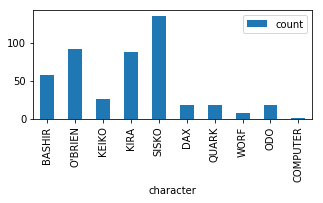

In [17]:
acession_df.plot(kind='bar', figsize=(5,2));

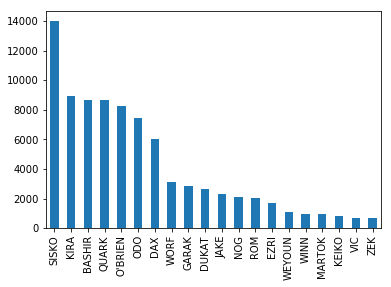

In [19]:
df['character'].value_counts()[:20].plot(kind='bar');

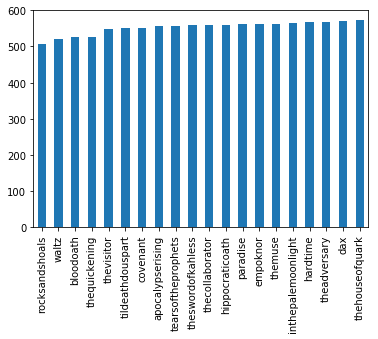

In [20]:
df['ep_title_formatted'].value_counts(ascending=True)[:20].plot(kind='bar');

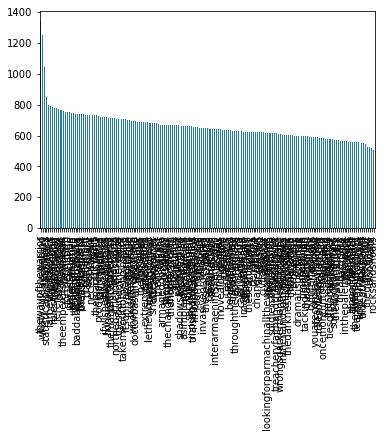

In [21]:
df['ep_title_formatted'].value_counts().plot(kind='bar');

In [25]:
def char_blob(df, char_name):
    char_name = char_name.upper()
    
    sentiment_blob = []
    subjectivity_blob = []
    
    for line in df.loc[df['character'] == char_name]['text']:
        blob = TextBlob(line)
        sentiment_blob.append(blob.sentiment.polarity)
        subjectivity_blob.append(blob.sentiment.subjectivity)
        
    sns.distplot(sentiment_blob);
    sns.distplot(subjectivity_blob);

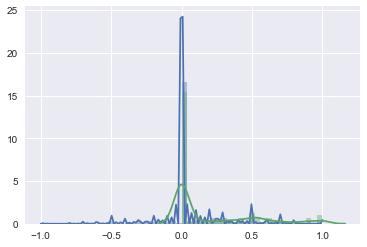

In [26]:
char_blob(df, 'bashir')

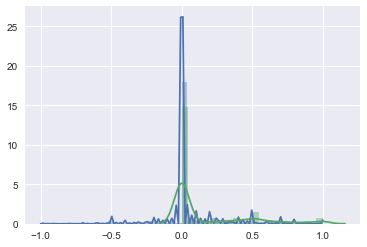

In [27]:
char_blob(df, 'worf')

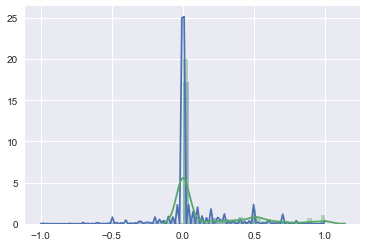

In [28]:
char_blob(df, 'sisko')

In [30]:
def ep_sentiment(df, episode):
    sentiment_blob = []
    
    for line in df.loc[df['ep_title_formatted'] == episode]['text']:
        blob = TextBlob(line)
        sentiment_blob.append(blob.sentiment.polarity)
        
    #print('avg:', np.mean(sentiment_blob))
    #sns.distplot(sentiment_blob)
    return np.mean(sentiment_blob)

In [31]:
all_sentiments = []

for each in set(df['ep_title_formatted']):
    all_sentiments.append(ep_sentiment(df, each))

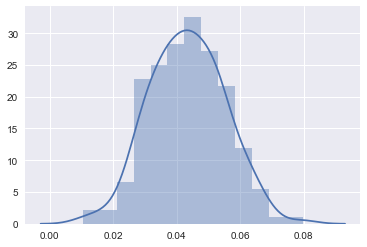

In [32]:
sns.distplot(all_sentiments);

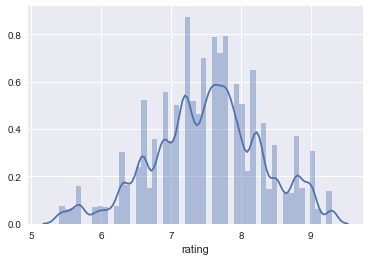

In [33]:
sns.distplot(df['rating']);

In [34]:
df['rating'].describe()

count    114487.000000
mean          7.520189
std           0.790671
min           5.400000
25%           7.000000
50%           7.600000
75%           8.000000
max           9.300000
Name: rating, dtype: float64

In [35]:
df.loc[df['rating'] > 7.5]['character'].value_counts()[:10]

SISKO      7614
KIRA       4409
BASHIR     4366
O'BRIEN    4231
ODO        3380
QUARK      3252
DAX        2383
GARAK      2095
DUKAT      2074
WORF       1609
Name: character, dtype: int64

In [36]:
df['character'].value_counts()[:10]

SISKO      14023
KIRA        8963
BASHIR      8668
QUARK       8649
O'BRIEN     8238
ODO         7467
DAX         6016
WORF        3113
GARAK       2854
DUKAT       2612
Name: character, dtype: int64

In [38]:
def above_avg_proportion(df, char_name):
    
    '''Returns the proportion of a character's lines spoken in episodes rated above average out
    of all lines spoken by the character '''
    
    char_name = char_name.upper()
    
    above_avg_count = df.loc[df['rating'] > 7.5].loc[df['character'] == char_name].shape[0]
    all_count = df.loc[df['character'] == char_name].shape[0]
    
    char_p = above_avg_count/all_count
    #print(char_p)
    
    return char_p

In [39]:
above_avg_proportion(df, 'garak')

0.7340574632095305

In [42]:
proportions = []
for char in common_chars:
    
    char_prop = above_avg_proportion(df, char)
    proportions.append(char_prop)
    
    #print(char, char_prop, '\n')

In [43]:
above_avg_prop_df = pd.DataFrame(list(zip(common_chars, proportions)), columns=['character', 'proportion'])
above_avg_prop_df.set_index('character', inplace=True)
above_avg_prop_df.head()

,proportion
character,
SISKO,0.542965
KIRA,0.491911
BASHIR,0.503692
QUARK,0.375997
O'BRIEN,0.513596


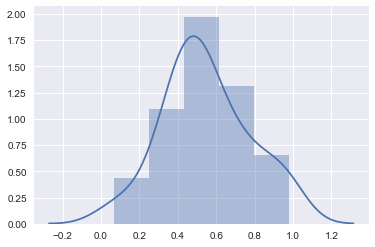

In [45]:
sns.distplot(above_avg_prop_df);

In [48]:
above_avg_prop_df.sort_values(by='proportion', ascending=False)

,proportion
character,
EDDINGTON,0.978159
WEYOUN,0.938202
DAMAR,0.933622
DUKAT,0.794028
MARTOK,0.783386
GARAK,0.734057
VIC,0.668079
KASIDY,0.645631
NOG,0.615679


It's always best to start with a linear model. I'm going to test two models: first, one that indicates whether a given character is present in an episode, and then a model that uses the number of lines each character has in an episode, attempting to use both to predict IMDB rating. I need to be wary of making sure my test-train splits are stratified, and my dataset for this will be rather small, so that's something to stay cognizant of as well.

In [87]:
ep_dict

{'accession': {'BASHIR': 58,
  'COMPUTER': 2,
  'DAX': 19,
  'KEIKO': 26,
  'KIRA': 88,
  "O'BRIEN": 92,
  'ODO': 19,
  'QUARK': 18,
  'SISKO': 136,
  'WORF': 8},
 'afterimage': {'BASHIR': 55,
  'EZRI': 253,
  'GARAK': 150,
  'JAKE': 1,
  'KIRA': 6,
  "O'BRIEN": 15,
  'ODO': 13,
  'QUARK': 38,
  'SISKO': 96,
  'WORF': 38},
 'amanalone': {'BASHIR': 80,
  'COMPUTER': 2,
  'DAX': 46,
  'JAKE': 12,
  'KEIKO': 63,
  'KIRA': 30,
  'NOG': 7,
  "O'BRIEN": 29,
  'ODO': 100,
  'QUARK': 29,
  'ROM': 25,
  'SISKO': 98},
 'apocalypserising': {'BASHIR': 35,
  'DAMAR': 8,
  'DAX': 8,
  'DUKAT': 41,
  'GARAK': 1,
  'JAKE': 7,
  'KIRA': 46,
  'MARTOK': 54,
  "O'BRIEN": 47,
  'ODO': 81,
  'QUARK': 12,
  'SISKO': 91,
  'WORF': 68},
 'armageddongame': {'BASHIR': 200,
  'DAX': 30,
  'KEIKO': 36,
  'KIRA': 29,
  "O'BRIEN": 147,
  'ODO': 3,
  'QUARK': 11,
  'SISKO': 90},
 'asimpleinvestigation': {'BASHIR': 47,
  'COMPUTER': 1,
  'DAX': 24,
  'KIRA': 18,
  "O'BRIEN": 16,
  'ODO': 235,
  'QUARK': 6,
  'SISKO':

In [89]:
# for char in common_chars:
#     count_of_char_lines[char]

In [52]:
## First trying to make one dictionary into one row.

In [176]:
def dict_to_row(my_dict, ep_title):
    temp_dict = my_dict[ep_title]
    temp_df = pd.DataFrame(list(temp_dict.items()), columns=['char', 'count'])
    temp_df.set_index('char', inplace=True)
    temp_df = temp_df.transpose()
    temp_df['ep'] = ep_title
    return temp_df

In [346]:
char_count_per_ep_df = pd.DataFrame(ep_dict).transpose().fillna(0).sort_values(by='index')

In [347]:
char_count_per_ep_df.head()

,BAREIL,BASHIR,COMPUTER,DAMAR,DAX,DUKAT,EDDINGTON,EZRI,GARAK,JAKE,...,ODO,QUARK,ROM,SISKO,VIC,WEYOUN,WINN,WORF,ZEK,index
emissary,0.0,27.0,36.0,0.0,79.0,25.0,0.0,0.0,0.0,25.0,...,34.0,34.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,1.0
pastprologue,0.0,59.0,0.0,0.0,12.0,0.0,0.0,0.0,65.0,0.0,...,48.0,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,2.0
amanalone,0.0,80.0,2.0,0.0,46.0,0.0,0.0,0.0,0.0,12.0,...,100.0,29.0,25.0,98.0,0.0,0.0,0.0,0.0,0.0,3.0
babel,0.0,65.0,33.0,0.0,22.0,0.0,0.0,0.0,0.0,8.0,...,76.0,84.0,0.0,119.0,0.0,0.0,0.0,0.0,0.0,4.0
captivepursuit,0.0,2.0,7.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,32.0,35.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,5.0


In [268]:
char_count_per_ep_df.tail()

,BAREIL,BASHIR,COMPUTER,DAMAR,DAX,DUKAT,EDDINGTON,EZRI,GARAK,JAKE,...,ODO,QUARK,ROM,SISKO,VIC,WEYOUN,WINN,WORF,ZEK,index
whenitrains,0.0,135.0,0.0,18.0,0.0,31.0,0.0,16.0,28.0,0.0,...,44.0,9.0,0.0,43.0,0.0,0.0,37.0,10.0,0.0,169.0
tackingintothewind,0.0,39.0,0.0,25.0,0.0,0.0,0.0,22.0,72.0,0.0,...,39.0,0.0,0.0,27.0,0.0,12.0,0.0,60.0,0.0,170.0
extrememeasures,0.0,277.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,...,29.0,0.0,0.0,34.0,0.0,0.0,0.0,3.0,0.0,171.0
thedogsofwar,0.0,57.0,1.0,40.0,0.0,0.0,0.0,34.0,32.0,0.0,...,18.0,131.0,36.0,46.0,0.0,15.0,0.0,2.0,46.0,172.0
whatyouleavebehind,0.0,72.0,3.0,31.0,0.0,64.0,0.0,44.0,82.0,11.0,...,79.0,59.0,0.0,126.0,31.0,65.0,49.0,28.0,0.0,173.0


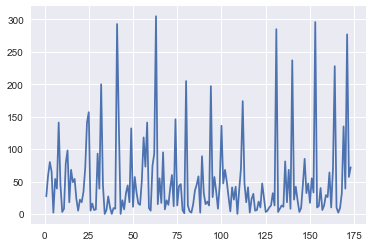

In [272]:
plt.plot(char_count_per_ep_df['index'], char_count_per_ep_df['BASHIR']);

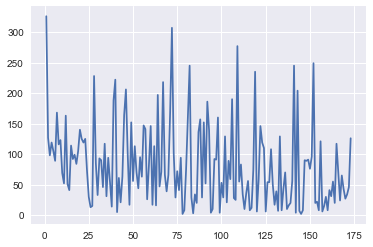

In [273]:
plt.plot(char_count_per_ep_df['index'], char_count_per_ep_df['SISKO']);

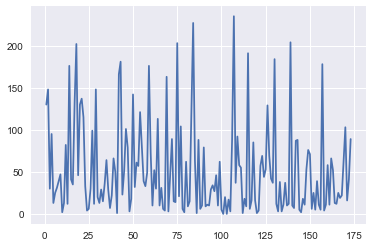

In [274]:
plt.plot(char_count_per_ep_df['index'], char_count_per_ep_df['KIRA']);

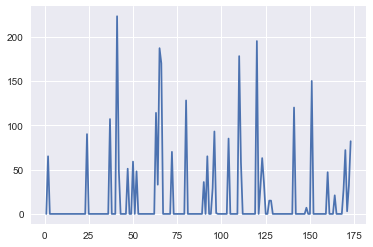

In [275]:
plt.plot(char_count_per_ep_df['index'], char_count_per_ep_df['GARAK']);

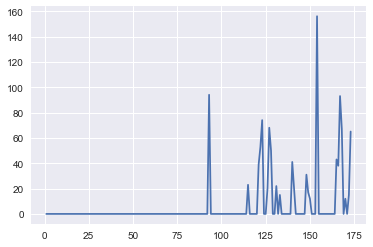

In [276]:
plt.plot(char_count_per_ep_df['index'], char_count_per_ep_df['WEYOUN']);

In [308]:
df.loc[df['ep_title_formatted'] == 'amanalone']['rating'][:1].values[0]

6.9000000000000004

In [311]:
rating_title_dic = {}

for each in set(df['ep_title_formatted']):
    try:
        rating_title_dic[each] = df.loc[df['ep_title_formatted'] == each]['rating'][:1].values[0]
    except:
        pass

In [345]:
pd.DataFrame(list(rating_title_dic.items())).head()

,0,1
0,treacheryfaithandthegreatriver,8.2
1,thesearchpart1,8.4
2,theascent,7.4
3,armageddongame,7.4
4,thevisitor,9.1


In [330]:
ep_rating_df = pd.DataFrame(list(rating_title_dic.items()), columns=['ep', 'rating'])

In [339]:
trying = imdb_df[['ep_title_formatted', 'rating']].set_index('ep_title_formatted')

In [341]:
#pd.DataFrame.join(char_count_per_ep_df, trying, ind)

In [325]:
char_count_per_ep_df

,BAREIL,BASHIR,COMPUTER,DAMAR,DAX,DUKAT,EDDINGTON,EZRI,GARAK,JAKE,...,QUARK,ROM,SISKO,VIC,WEYOUN,WINN,WORF,ZEK,index,rating
emissary,0.0,27.0,36.0,0.0,79.0,25.0,0.0,0.0,0.0,25.0,...,34.0,0.0,326.0,0.0,0.0,0.0,0.0,0.0,1.0,None
pastprologue,0.0,59.0,0.0,0.0,12.0,0.0,0.0,0.0,65.0,0.0,...,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,2.0,None
amanalone,0.0,80.0,2.0,0.0,46.0,0.0,0.0,0.0,0.0,12.0,...,29.0,25.0,98.0,0.0,0.0,0.0,0.0,0.0,3.0,None
babel,0.0,65.0,33.0,0.0,22.0,0.0,0.0,0.0,0.0,8.0,...,84.0,0.0,119.0,0.0,0.0,0.0,0.0,0.0,4.0,None
captivepursuit,0.0,2.0,7.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,...,35.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,5.0,None
qless,0.0,54.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,...,121.0,0.0,89.0,0.0,0.0,0.0,0.0,0.0,6.0,None
dax,0.0,39.0,1.0,0.0,51.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,168.0,0.0,0.0,0.0,0.0,0.0,7.0,None
thepassenger,0.0,141.0,5.0,0.0,65.0,0.0,0.0,0.0,0.0,0.0,...,64.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,8.0,None
movealonghome,0.0,45.0,3.0,0.0,47.0,0.0,0.0,0.0,0.0,29.0,...,146.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,9.0,None
thenagus,0.0,3.0,1.0,0.0,11.0,0.0,0.0,0.0,0.0,71.0,...,160.0,54.0,69.0,0.0,0.0,0.0,0.0,98.0,10.0,None


In [260]:
char_count_per_ep_df.to_csv('ds9_char_count_per_ep.csv')

In [332]:
imdb_df = pd.read_csv('./imdb_ds9_data.csv')

In [334]:
imdb_df.head()

,airdate,ep_name,number,rating,season,index
0,3 Jan. 1993,Emissary,1,7.5,1,1
1,10 Jan. 1993,Past Prologue,2,7.0,1,2
2,17 Jan. 1993,A Man Alone,3,6.9,1,3
3,24 Jan. 1993,Babel,4,6.9,1,4
4,31 Jan. 1993,Captive Pursuit,5,7.7,1,5


In [335]:
imdb_df['ep_title_formatted'] = [''.join(e for e in title if e.isalnum()).lower() for title in imdb_df['ep_name']]

In [337]:
imdb_df[['ep_title_formatted', 'rating']]

,ep_title_formatted,rating
0,emissary,7.5
1,pastprologue,7.0
2,amanalone,6.9
3,babel,6.9
4,captivepursuit,7.7
5,qless,6.8
6,dax,7.1
7,thepassenger,6.4
8,movealonghome,5.9
9,thenagus,7.1


In [343]:
imdb_df

,airdate,ep_name,number,rating,season,index,ep_title_formatted
0,3 Jan. 1993,Emissary,1,7.5,1,1,emissary
1,10 Jan. 1993,Past Prologue,2,7.0,1,2,pastprologue
2,17 Jan. 1993,A Man Alone,3,6.9,1,3,amanalone
3,24 Jan. 1993,Babel,4,6.9,1,4,babel
4,31 Jan. 1993,Captive Pursuit,5,7.7,1,5,captivepursuit
5,7 Feb. 1993,Q-Less,6,6.8,1,6,qless
6,14 Feb. 1993,Dax,7,7.1,1,7,dax
7,22 Feb. 1993,The Passenger,8,6.4,1,8,thepassenger
8,14 Mar. 1993,Move Along Home,9,5.9,1,9,movealonghome
9,21 Mar. 1993,The Nagus,10,7.1,1,10,thenagus


In [344]:
pd.merge(char_count_per_ep_df, imdb_df)

,BAREIL,BASHIR,COMPUTER,DAMAR,DAX,DUKAT,EDDINGTON,EZRI,GARAK,JAKE,...,WINN,WORF,ZEK,index,rating,airdate,ep_name,number,season,ep_title_formatted


In [349]:
char_count_per_ep_df.reset_index(level=None, inplace=True)

In [355]:
char_count_per_ep_df.rename(columns={'level_0': 'ep_title_formatted'}, inplace=True)

In [356]:
imdb_df.head()

,airdate,ep_name,number,rating,season,index,ep_title_formatted
0,3 Jan. 1993,Emissary,1,7.5,1,1,emissary
1,10 Jan. 1993,Past Prologue,2,7.0,1,2,pastprologue
2,17 Jan. 1993,A Man Alone,3,6.9,1,3,amanalone
3,24 Jan. 1993,Babel,4,6.9,1,4,babel
4,31 Jan. 1993,Captive Pursuit,5,7.7,1,5,captivepursuit


In [358]:
ds9_rating_and_char_count = pd.merge(char_count_per_ep_df, imdb_df, on='ep_title_formatted')

In [359]:
ds9_rating_and_char_count.to_csv('ds9_rating_and_char_count.csv', index=False)

In [361]:
above_avg_prop_df.sort_values(by='proportion', ascending=False).index[:10]

Index(['EDDINGTON', 'WEYOUN', 'DAMAR', 'DUKAT', 'MARTOK', 'GARAK', 'VIC',
       'KASIDY', 'NOG', 'WINN'],
      dtype='object', name='character')

In [365]:
cv = CountVectorizer()
cv.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [363]:
X = df['text']

In [ ]:
pd.DataFrame(cv.transform(X).todense(),
            columns=cv.get_feature_names()).sum().sort_values(ascending=False)[:25].plot(kind='bar', figsize=(15,5));